In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ieee-fraud-detection/sample_submission.csv
/kaggle/input/ieee-fraud-detection/test_identity.csv
/kaggle/input/ieee-fraud-detection/train_identity.csv
/kaggle/input/ieee-fraud-detection/test_transaction.csv
/kaggle/input/ieee-fraud-detection/train_transaction.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
tr = pd.read_csv("/kaggle/input/ieee-fraud-detection/train_transaction.csv")
idt = pd.read_csv("/kaggle/input/ieee-fraud-detection/train_identity.csv")
test_tr = pd.read_csv('/kaggle/input/ieee-fraud-detection/test_transaction.csv')
test_idt = pd.read_csv('/kaggle/input/ieee-fraud-detection/test_identity.csv')

In [4]:
test_idt.columns=idt.columns

In [5]:
print("Transection df shape: ",tr.shape)
print("Identity df shape: ",idt.shape)
print("test Transection df shape: ",test_tr.shape)
print("test Identity df shape: ",test_idt.shape)

Transection df shape:  (590540, 394)
Identity df shape:  (144233, 41)
test Transection df shape:  (506691, 393)
test Identity df shape:  (141907, 41)


In [6]:
def optimize_memory(df: pd.DataFrame) -> pd.DataFrame:
    for col in df.columns:
        col_type = df[col].dtype
        if col_type == object: 
            continue

        c_min = df[col].min()
        c_max = df[col].max()
        if str(col_type)[:3] == 'int':
            if c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                df[col] = df[col].astype(np.int32)
            elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                df[col] = df[col].astype(np.int64)  
        else:
            if c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                df[col] = df[col].astype(np.float32)
            else:
                df[col] = df[col].astype(np.float64)

    return df

In [7]:
idt = optimize_memory(idt)
tr = optimize_memory(tr)
test_idt = optimize_memory(test_idt)
test_tr = optimize_memory(test_tr)

In [8]:
idt_cols = idt.columns
tr_cols = tr.columns

In [9]:
idt['DeviceInfo_extracted']=[str(val).split(' ')[0].lower() for val in idt['DeviceInfo']]
idt['id_34']=idt['id_34'].fillna("-1:-1")
idt['match_status']=[int(str(val).split(':')[1]) for val in idt['id_34']]
idt['id31_extracted']=[str(val).split(' ')[0].lower() for val in idt['id_31']]
idt['id30_extracted']=[str(val).split(' ')[0].lower() for val in idt['id_30']]
idt['id_33']=idt['id_33'].fillna('0x0')
idt['id33_width']=[int(str(val).split('x')[0]) for val in idt['id_33']]
idt['id33_height']=[int(str(val).split('x')[1]) for val in idt['id_33']]
tr['Pemaildomain_extracted']=[str(val).split(".")[0] for val in tr['P_emaildomain']]
tr['Remaildomain_extracted']=[str(val).split(".")[0] for val in tr['R_emaildomain']]


test_idt['DeviceInfo_extracted']=[str(val).split(' ')[0].lower() for val in test_idt['DeviceInfo']]
test_idt['id_34']=test_idt['id_34'].fillna("-1:-1")
test_idt['match_status']=[int(str(val).split(':')[1]) for val in test_idt['id_34']]
test_idt['id31_extracted']=[str(val).split(' ')[0].lower() for val in test_idt['id_31']]
test_idt['id30_extracted']=[str(val).split(' ')[0].lower() for val in test_idt['id_30']]
test_idt['id_33']=test_idt['id_33'].fillna('0x0')
test_idt['id33_width']=[int(str(val).split('x')[0]) for val in test_idt['id_33']]
test_idt['id33_height']=[int(str(val).split('x')[1]) for val in test_idt['id_33']]
test_tr['Pemaildomain_extracted']=[str(val).split(".")[0] for val in test_tr['P_emaildomain']]
test_tr['Remaildomain_extracted']=[str(val).split(".")[0] for val in test_tr['R_emaildomain']]

/tmp/ipykernel_250/2352197906.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tr['Pemaildomain_extracted']=[str(val).split(".")[0] for val in tr['P_emaildomain']]
/tmp/ipykernel_250/2352197906.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tr['Remaildomain_extracted']=[str(val).split(".")[0] for val in tr['R_emaildomain']]
/tmp/ipykernel_250/2352197906.py:21: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

In [10]:
idt.drop(columns=['id_30','id_31','id_33','id_34','DeviceInfo'],inplace=True)
test_idt.drop(columns=['id_30','id_31','id_33','id_34','DeviceInfo'],inplace=True)

tr.drop(columns=['P_emaildomain','R_emaildomain'],inplace=True)
test_tr.drop(columns=['P_emaildomain','R_emaildomain'],inplace=True)

In [11]:
idt['DeviceInfo_extracted']=idt['DeviceInfo_extracted'].replace('nan',np.nan)
idt['id30_extracted']=idt['id30_extracted'].replace('nan',np.nan)
idt['id31_extracted']=idt['id31_extracted'].replace('nan',np.nan)

test_idt['DeviceInfo_extracted']=test_idt['DeviceInfo_extracted'].replace('nan',np.nan)
test_idt['id30_extracted']=test_idt['id30_extracted'].replace('nan',np.nan)
test_idt['id31_extracted']=test_idt['id31_extracted'].replace('nan',np.nan)

In [12]:
from datetime import datetime, date, timedelta

init_date = datetime(2018, 1, 1, 0, 0, 0) # asumption init date is 2018-1-1 as the competition was held in 2019

tr["datetime"] = tr.TransactionDT.apply(lambda x: (init_date + timedelta(seconds=x)))
test_tr["datetime"] = test_tr.TransactionDT.apply(lambda x: (init_date + timedelta(seconds=x)))

/tmp/ipykernel_250/4206150587.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tr["datetime"] = tr.TransactionDT.apply(lambda x: (init_date + timedelta(seconds=x)))
/tmp/ipykernel_250/4206150587.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_tr["datetime"] = test_tr.TransactionDT.apply(lambda x: (init_date + timedelta(seconds=x)))


In [13]:
tr['month'] = tr['datetime'].dt.month
tr['weekday'] = tr['datetime'].dt.dayofweek
tr['hour'] = tr['datetime'].dt.hour
tr['day'] = tr['datetime'].dt.day

test_tr['month'] = test_tr['datetime'].dt.month
test_tr['weekday'] = test_tr['datetime'].dt.dayofweek
test_tr['hour'] = test_tr['datetime'].dt.hour
test_tr['day'] = test_tr['datetime'].dt.day

/tmp/ipykernel_250/1837169152.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tr['month'] = tr['datetime'].dt.month
/tmp/ipykernel_250/1837169152.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tr['weekday'] = tr['datetime'].dt.dayofweek
/tmp/ipykernel_250/1837169152.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `

In [14]:
tr = tr.drop(columns=['datetime'])
test_tr = test_tr.drop(columns=['datetime'])

In [15]:
catcols_tr=['ProductCD','addr1','addr2','card1','card2','card3','card4','card5','card6',
           'M1','M2','M3','M4','M5','M6','M7','M8','M9','Pemaildomain_extracted','Remaildomain_extracted']

In [16]:
catcols_idt=['DeviceInfo_extracted','DeviceType','id_12','id_13','id_14','id_15','id_16','id_17','id_18',
             'id_19','id_20','id_21','id_22','id_23','id_24','id_25','id_26','id_27','id_28','id_29',
             'id30_extracted','id31_extracted','id_32','match_status','id_35','id_36','id_37','id_38']

In [17]:
print(tr['TransactionID'].duplicated().sum())
print(idt['TransactionID'].duplicated().sum())

0
0


In [18]:
merged_df=pd.merge(tr,idt,on='TransactionID',how='left')
merged_test_df=pd.merge(test_tr,test_idt,on='TransactionID',how='left')

In [19]:
TransactionID = merged_test_df['TransactionID']
merged_df = merged_df.drop(columns=['TransactionID'])
merged_test_df = merged_test_df.drop(columns=['TransactionID'])

In [20]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(merged_df.drop(columns=['isFraud']),merged_df['isFraud'],
                                                 test_size=0.20,random_state=42)


In [21]:
columns_with_less_unique_values = [col for col in x_train.columns if x_train[col].nunique()<100]  
#map these with their frequency and fraud_rte.

In [22]:
len(columns_with_less_unique_values)

284

In [23]:
del merged_df,tr,idt,test_tr,test_idt
import gc;
gc.collect()

5

In [24]:
x_train.shape

(472432, 437)

In [25]:
x_test.shape

(118108, 437)

In [26]:
cols_with_less_missing_values = [col for col in x_train.columns if (x_train[col].isnull().sum()<80000)
                                 & (x_train[col].isnull().sum()>0)]

In [27]:
print(cols_with_less_missing_values)

['card2', 'card3', 'card4', 'card5', 'card6', 'addr1', 'addr2', 'D1', 'D10', 'D15', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31', 'V32', 'V33', 'V34', 'V53', 'V54', 'V55', 'V56', 'V57', 'V58', 'V59', 'V60', 'V61', 'V62', 'V63', 'V64', 'V65', 'V66', 'V67', 'V68', 'V69', 'V70', 'V71', 'V72', 'V73', 'V74', 'V75', 'V76', 'V77', 'V78', 'V79', 'V80', 'V81', 'V82', 'V83', 'V84', 'V85', 'V86', 'V87', 'V88', 'V89', 'V90', 'V91', 'V92', 'V93', 'V94', 'V95', 'V96', 'V97', 'V98', 'V99', 'V100', 'V101', 'V102', 'V103', 'V104', 'V105', 'V106', 'V107', 'V108', 'V109', 'V110', 'V111', 'V112', 'V113', 'V114', 'V115', 'V116', 'V117', 'V118', 'V119', 'V120', 'V121', 'V122', 'V123', 'V124', 'V125', 'V126', 'V127', 'V128', 'V129', 'V130', 'V131', 'V132', 'V133', 'V134', 'V135', 'V136', 'V137', 'V279', 'V280', 'V281', 'V282', 'V283', 'V284', 'V285', 'V286', 'V287', 'V288', 'V289', 'V290', 'V291', 'V292', 'V293', 'V

In [28]:
max(x_train[cols_with_less_missing_values].nunique().values)

32397

In [29]:
for col in cols_with_less_missing_values:
    merged_test_df[col]=merged_test_df[col].replace('321.0',np.nan)
    #mode = tr[col].mode()[0]
    #tr[col].fillna(mode, inplace=True)
    #test_tr.fillna(mode,inplace=True)
    x_test.loc[x_test[col].isnull(), col] = x_train[col].dropna().sample(x_test[col].isnull().sum(), random_state=42).values
    merged_test_df.loc[merged_test_df[col].isnull(),col]=x_train[col].dropna().sample(merged_test_df[col].isnull().sum(),random_state=42).values
    x_train.loc[x_train[col].isnull(), col] = x_train[col].dropna().sample(x_train[col].isnull().sum(), random_state=42).values

In [30]:
cols_with_less_missing_values = [col for col in x_train.columns if (x_train[col].isnull().sum()<200000)
                                 & (x_train[col].isnull().sum()>0)]

In [31]:
print(cols_with_less_missing_values)

['D4', 'M6', 'V35', 'V36', 'V37', 'V38', 'V39', 'V40', 'V41', 'V42', 'V43', 'V44', 'V45', 'V46', 'V47', 'V48', 'V49', 'V50', 'V51', 'V52']


In [32]:
x_train[cols_with_less_missing_values].nunique()

D4     789
M6       2
V35      4
V36      6
V37     45
V38     53
V39     16
V40     18
V41      2
V42      9
V43      9
V44     47
V45     48
V46      7
V47      9
V48      6
V49      6
V50      6
V51      7
V52      9
dtype: int64

In [33]:
import warnings
warnings.simplefilter(action='ignore', category=pd.errors.PerformanceWarning)

for col in cols_with_less_missing_values:
    col_name = str(col)+"_missing_indicator"
    x_train[col_name] = x_train[col].isnull().astype(int)
    x_test[col_name] = x_test[col].isnull().astype(int)
    
    merged_test_df[col]=merged_test_df[col].replace('321.0',np.nan)
    merged_test_df[col_name] = merged_test_df[col].isnull().astype(int)

In [34]:
for col in cols_with_less_missing_values:
    x_test.loc[x_test[col].isnull(), col] = x_train[col].dropna().sample(x_test[col].isnull().sum(), random_state=42).values
    merged_test_df.loc[merged_test_df[col].isnull(),col]=x_train[col].dropna().sample(merged_test_df[col].isnull().sum(),random_state=42).values
    x_train.loc[x_train[col].isnull(), col] = x_train[col].dropna().sample(x_train[col].isnull().sum(), random_state=42).values

In [35]:
null_count=x_train.isnull().sum()
remaining_cols_with_missings=null_count[null_count>0].index

In [36]:
cat_cols_with_missings = x_train[remaining_cols_with_missings].select_dtypes(include=['object']).columns
num_cols_with_missings = x_train[remaining_cols_with_missings].select_dtypes(exclude = ['object']).columns

In [37]:
import warnings
warnings.simplefilter(action='ignore', category=pd.errors.PerformanceWarning)

for col in remaining_cols_with_missings:
    col_name = str(col)+'_missing_indicator'
    x_train[col_name] = x_train[col].isnull().astype(int)
    x_test[col_name] = x_test[col].isnull().astype(int)
    
    merged_test_df[col] = merged_test_df[col].replace('321.0',np.nan)
    merged_test_df[col_name] = merged_test_df[col].isnull().astype(int)

In [38]:
for col in cat_cols_with_missings:
    x_train[col]= x_train[col].fillna('missing')
    x_test[col]= x_test[col].fillna('missing')
    merged_test_df[col]= merged_test_df[col].fillna('missing')

In [39]:
for col in num_cols_with_missings:
    x_train[col]= x_train[col].fillna(-999)
    x_test[col]= x_test[col].fillna(-999)
    merged_test_df[col]= merged_test_df[col].fillna(-999)

In [40]:
xtrain_cols_with_nan=x_train.isnull().sum()
xtest_cols_with_nan=x_test.isnull().sum()
test_cols_with_nan=merged_test_df.isnull().sum()

print("columns in x_train with nan values : ",xtrain_cols_with_nan[xtrain_cols_with_nan>0])
print("columns in x_test with nan values : ",xtest_cols_with_nan[xtest_cols_with_nan>0])
print("columns in test with nan values : ",test_cols_with_nan[test_cols_with_nan>0])

columns in x_train with nan values :  Series([], dtype: int64)
columns in x_test with nan values :  Series([], dtype: int64)
columns in test with nan values :  C1        3
C2        3
C3        3
C4        3
C5        3
C6        3
C7        3
C8        3
C9        3
C10       3
C11       3
C12       3
C13    4748
C14       3
dtype: int64


In [41]:
remaining_cols_in_test = test_cols_with_nan[test_cols_with_nan>0].index

In [42]:
for col in remaining_cols_in_test:
    merged_test_df.loc[merged_test_df[col].isnull(),col]=x_train[col].dropna().sample(merged_test_df[col].isnull().sum(),random_state=42).values

In [43]:
num_bins = 10

# 1. Compute bins from train
_, bin_edges = pd.qcut(
    x_train['TransactionAmt'], 
    q=num_bins, 
    retbins=True, 
    duplicates='drop'
)

# 2. Extend edges to catch all test values
bin_edges[0] = -np.inf
bin_edges[-1] = np.inf

# 3. Apply to train
x_train['TransactionAmt_bin'] = pd.cut(
    x_train['TransactionAmt'], 
    bins=bin_edges, 
    include_lowest=True
)

# 4. Apply to test
x_test['TransactionAmt_bin'] = pd.cut(
    x_test['TransactionAmt'], 
    bins=bin_edges, 
    include_lowest=True
)

merged_test_df['TransactionAmt_bin'] = pd.cut(
    merged_test_df['TransactionAmt'], 
    bins=bin_edges, 
    include_lowest=True
)

In [44]:
x_train=x_train.drop(columns=['TransactionAmt'])
x_test=x_test.drop(columns=['TransactionAmt'])
merged_test_df=merged_test_df.drop(columns=['TransactionAmt'])

In [45]:
catcols = catcols_tr+catcols_idt+['TransactionAmt_bin']

In [46]:
x_train[catcols].nunique()

ProductCD                     5
addr1                       313
addr2                        68
card1                     12804
card2                       500
card3                       106
card4                         4
card5                       116
card6                         4
M1                            3
M2                            3
M3                            3
M4                            4
M5                            3
M6                            2
M7                            3
M8                            3
M9                            3
Pemaildomain_extracted       45
Remaildomain_extracted       46
DeviceInfo_extracted       1109
DeviceType                    3
id_12                         3
id_13                        54
id_14                        25
id_15                         4
id_16                         3
id_17                       100
id_18                        18
id_19                       515
id_20                       378
id_21   

In [47]:
columns_with_less_unique_values = catcols+columns_with_less_unique_values

In [48]:
x_train.shape

(472432, 689)

In [49]:
x_train['isFraud'] = y_train
global_overall_rate = x_train['isFraud'].mean()

for col in catcols:
    col2_name = f"{col}_Frequency"
    ''' #fraud_rate map
    overall_fraud_rate = x_train.groupby(col)['isFraud'].mean()
    x_train[col1_name] = x_train[col].map(overall_fraud_rate).astype(float)
    x_test[col1_name] = x_test[col].map(overall_fraud_rate).astype(float).fillna(global_overall_rate)
    merged_test_df[col1_name] = merged_test_df[col].map(overall_fraud_rate).astype(float).fillna(global_overall_rate)'''
    #frequency map
    freq = x_train[col].value_counts()
    x_train[col2_name] = x_train[col].map(freq).astype(float)
    x_test[col2_name] = x_test[col].map(freq).astype(float).fillna(0)
    merged_test_df[col2_name] = merged_test_df[col].map(freq).astype(float).fillna(0)

In [50]:
# Global rates
global_overall_rate = x_train['isFraud'].mean()
global_hourly_rate = x_train.groupby(['hour'])['isFraud'].mean()
global_daily_rate = x_train.groupby(['day'])['isFraud'].mean()
global_monthly_rate = x_train.groupby(['month'])['isFraud'].mean()

for col in catcols:
    # Column names
    col1_name = f"{col}_overall_FraudRate"
    col2_name = f"{col}_hourly_FraudRate"
    col3_name = f"{col}_daily_FraudRate"
    col4_name = f"{col}_monthly_FraudRate"

    # Fraud rates
    overall_fraud_rate = x_train.groupby(col)['isFraud'].mean()
    hourly_fraud_rate = x_train.groupby([col, 'hour'])['isFraud'].mean()
    daily_fraud_rate = x_train.groupby([col, 'day'])['isFraud'].mean()
    monthly_fraud_rate = x_train.groupby([col, 'month'])['isFraud'].mean()

    # 1. Overall
    x_train[col1_name] = x_train[col].map(overall_fraud_rate).astype(float)
    x_test[col1_name] = x_test[col].map(overall_fraud_rate).astype(float).fillna(global_overall_rate)
    merged_test_df[col1_name] = merged_test_df[col].map(overall_fraud_rate).astype(float).fillna(global_overall_rate)

    # 2. Hourly
    x_train[col2_name] = list(zip(x_train[col], x_train['hour']))
    x_train[col2_name] = x_train[col2_name].map(hourly_fraud_rate).astype(float)

    x_test[col2_name] = list(zip(x_test[col], x_test['hour']))
    x_test[col2_name] = x_test[col2_name].map(hourly_fraud_rate).astype(float).fillna(
        x_test['hour'].map(global_hourly_rate).fillna(global_overall_rate)
    )

    merged_test_df[col2_name] = list(zip(merged_test_df[col], merged_test_df['hour']))
    merged_test_df[col2_name] = merged_test_df[col2_name].map(hourly_fraud_rate).astype(float).fillna(
        merged_test_df['hour'].map(global_hourly_rate).fillna(global_overall_rate)
    )

    # 3. Daily
    x_train[col3_name] = list(zip(x_train[col], x_train['day']))
    x_train[col3_name] = x_train[col3_name].map(daily_fraud_rate).astype(float)

    x_test[col3_name] = list(zip(x_test[col], x_test['day']))
    x_test[col3_name] = x_test[col3_name].map(daily_fraud_rate).astype(float).fillna(
        x_test['day'].map(global_daily_rate).fillna(global_overall_rate)
    )

    merged_test_df[col3_name] = list(zip(merged_test_df[col], merged_test_df['day']))
    merged_test_df[col3_name] = merged_test_df[col3_name].map(daily_fraud_rate).astype(float).fillna(
        merged_test_df['day'].map(global_daily_rate).fillna(global_overall_rate)
    )

    # 4. Monthly
    x_train[col4_name] = list(zip(x_train[col], x_train['month']))
    x_train[col4_name] = x_train[col4_name].map(monthly_fraud_rate).astype(float)

    x_test[col4_name] = list(zip(x_test[col], x_test['month']))
    x_test[col4_name] = x_test[col4_name].map(monthly_fraud_rate).astype(float).fillna(
        x_test['month'].map(global_monthly_rate).fillna(global_overall_rate)
    )

    merged_test_df[col4_name] = list(zip(merged_test_df[col], merged_test_df['month']))
    merged_test_df[col4_name] = merged_test_df[col4_name].map(monthly_fraud_rate).astype(float).fillna(
        merged_test_df['month'].map(global_monthly_rate).fillna(global_overall_rate)
    )

/tmp/ipykernel_250/1022562043.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  overall_fraud_rate = x_train.groupby(col)['isFraud'].mean()
/tmp/ipykernel_250/1022562043.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hourly_fraud_rate = x_train.groupby([col, 'hour'])['isFraud'].mean()
/tmp/ipykernel_250/1022562043.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  daily_fraud_rate = x_train.groupby([col, 'day'

In [51]:
x_train = x_train.drop(columns=['isFraud']+catcols)
x_test = x_test.drop(columns=catcols)
merged_test_df = merged_test_df.drop(columns=catcols)

In [52]:
x_train.shape

(472432, 885)

In [53]:
'''#remove columns with less correlation with isFraud.
threshold = 0.02
correlations = x_train.sample(100000).corr()["isFraud"].drop("isFraud")
low_corr_cols = correlations[correlations.abs() < threshold].index.tolist()
low_corr_cols=[col for col in low_corr_cols if 'missing_indicator' not in str(col)]'''

'#remove columns with less correlation with isFraud.\nthreshold = 0.02\ncorrelations = x_train.sample(100000).corr()["isFraud"].drop("isFraud")\nlow_corr_cols = correlations[correlations.abs() < threshold].index.tolist()\nlow_corr_cols=[col for col in low_corr_cols if \'missing_indicator\' not in str(col)]'

In [54]:
'''x_train.drop(columns=['isFraud']+low_corr_cols,inplace=True)
x_test.drop(columns=low_corr_cols,inplace=True)
merged_test_df.drop(columns=low_corr_cols,inplace=True)'''

"x_train.drop(columns=['isFraud']+low_corr_cols,inplace=True)\nx_test.drop(columns=low_corr_cols,inplace=True)\nmerged_test_df.drop(columns=low_corr_cols,inplace=True)"

In [55]:
x_train.shape

(472432, 885)

In [56]:
'''x_train = x_train.drop(columns=['isFraud']+catcols)
x_test = x_test.drop(columns=catcols)
merged_test_df = merged_test_df.drop(columns=catcols)'''

"x_train = x_train.drop(columns=['isFraud']+catcols)\nx_test = x_test.drop(columns=catcols)\nmerged_test_df = merged_test_df.drop(columns=catcols)"

In [57]:
'''!pip install -U scikit-learn imbalanced-learn'''

'!pip install -U scikit-learn imbalanced-learn'

In [58]:
'''from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
x_train, y_train = smote.fit_resample(x_train,y_train)'''

'from imblearn.over_sampling import SMOTE\nsmote = SMOTE(random_state=42)\nx_train, y_train = smote.fit_resample(x_train,y_train)'

In [59]:
null_count=x_train.isnull().sum()
null_count[null_count>0].index

Index([], dtype='object')

In [60]:
x_train.shape

(472432, 885)

In [61]:
from sklearn.ensemble import IsolationForest

# Train on only non-fraud cases (majority class)
iso = IsolationForest(contamination=0.05, random_state=42)
iso.fit(x_train[y_train == 0])

# Predict anomaly score for all data
x_train["iso_score"] = iso.decision_function(x_train)
x_test["iso_score"] = iso.decision_function(x_test)
merged_test_df["iso_score"] = iso.decision_function(merged_test_df)

In [62]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)
test_scaled = scaler.transform(merged_test_df)

In [63]:
import matplotlib.pyplot as plt
from sklearn.metrics import (
    roc_curve, auc,
    precision_recall_curve, average_precision_score
)

def plot_model_curves(y_true, y_proba, model_name="Model"):
    # ---------- ROC Curve ----------
    fpr, tpr, _ = roc_curve(y_true, y_proba)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(12, 5))

    # Plot ROC
    plt.subplot(1, 2, 1)
    plt.plot(fpr, tpr, color='blue', lw=2, 
             label=f"AUC = {roc_auc:.4f}")
    plt.plot([0, 1], [0, 1], color='red', linestyle='--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate (Recall)")
    plt.title(f"ROC Curve - {model_name}")
    plt.legend(loc="lower right")
    plt.grid(True)

    # ---------- Precision-Recall Curve ----------
    precision, recall, _ = precision_recall_curve(y_true, y_proba)
    ap_score = average_precision_score(y_true, y_proba)

    plt.subplot(1, 2, 2)
    plt.plot(recall, precision, color='green', lw=2,
             label=f"AP = {ap_score:.4f}")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title(f"Precision-Recall Curve - {model_name}")
    plt.legend(loc="upper right")
    plt.grid(True)

    plt.tight_layout()
    plt.show()
    
    print(f"[{model_name}] ROC-AUC: {roc_auc:.4f}, Average Precision: {ap_score:.4f}")

In [64]:
from sklearn.linear_model import LogisticRegression
LRmodel=LogisticRegression(max_iter=150,class_weight={0:1,1:5},random_state=42,solver='newton-cholesky')
LRmodel.fit(x_train_scaled,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,"{0: 1, 1: 5}"
,random_state,42
,solver,'newton-cholesky'
,max_iter,150
,multi_class,'deprecated'


In [65]:
from sklearn.metrics import classification_report

y_pred = LRmodel.predict(x_test_scaled)
y_pred_proba = LRmodel.predict_proba(x_test_scaled)[:, 1]

y_predT = LRmodel.predict(test_scaled)

y_predT = pd.DataFrame({
    "TransactionID": TransactionID,
    "isFraud": y_predT
})
y_predT.to_csv("LRy_pred.csv", index=False)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98    113866
           1       0.52      0.53      0.53      4242

    accuracy                           0.97    118108
   macro avg       0.75      0.76      0.76    118108
weighted avg       0.97      0.97      0.97    118108



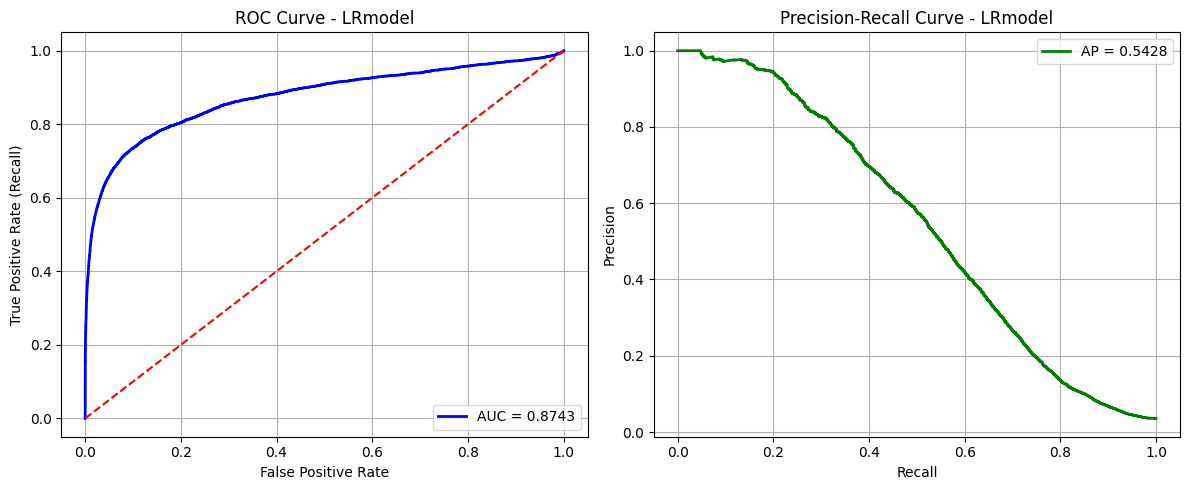

[LRmodel] ROC-AUC: 0.8743, Average Precision: 0.5428


In [66]:
plot_model_curves(y_test,y_pred_proba,'LRmodel')

In [67]:
from sklearn.tree import DecisionTreeClassifier
DTmodel=DecisionTreeClassifier(criterion='gini',splitter='best',random_state=42)
DTmodel.fit(x_train,y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [68]:
from sklearn.metrics import classification_report

y_pred2 = DTmodel.predict(x_test)
y_pred_proba2 = DTmodel.predict_proba(x_test)[:, 1]

y_predT2 = DTmodel.predict(merged_test_df)

y_predT2 = pd.DataFrame({
    "TransactionID": TransactionID,
    "isFraud": y_predT2
})
y_predT2.to_csv("DTy_pred.csv", index=False)

print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98    113866
           1       0.44      0.53      0.48      4242

    accuracy                           0.96    118108
   macro avg       0.71      0.75      0.73    118108
weighted avg       0.96      0.96      0.96    118108



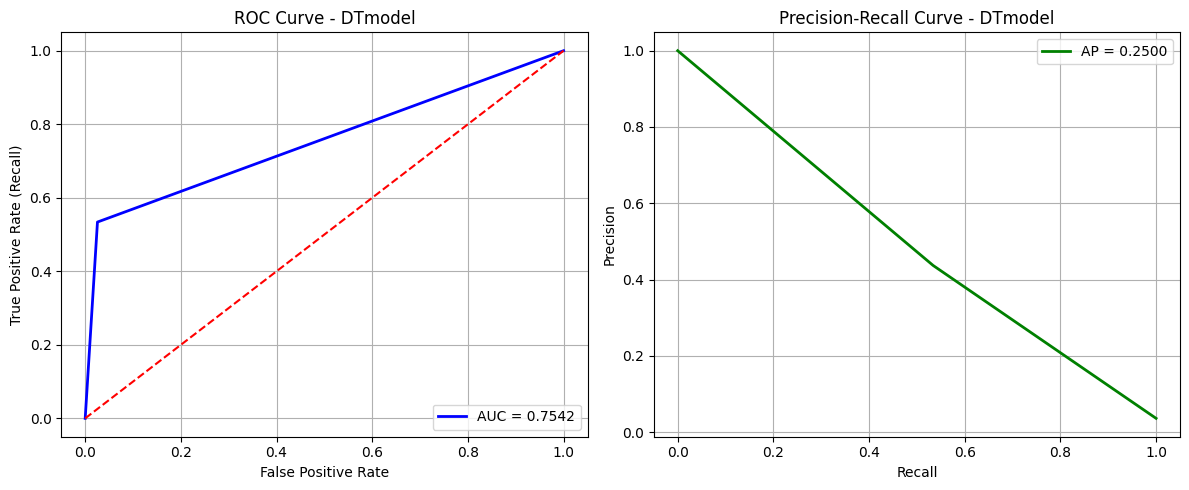

[DTmodel] ROC-AUC: 0.7542, Average Precision: 0.2500


In [69]:
plot_model_curves(y_test,y_pred_proba2,'DTmodel')

In [70]:
from sklearn.ensemble import RandomForestClassifier
RFmodel=RandomForestClassifier(n_estimators = 100,criterion='gini',bootstrap=True
                               ,oob_score=True,max_samples=0.8,max_features='sqrt',random_state=42,verbose=1)

RFmodel.fit(x_train,y_train)

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:  4.4min
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  8.9min finished


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,True


In [71]:
RFmodel.oob_score_

0.984738544383107

In [72]:
from sklearn.metrics import classification_report

y_pred3 = RFmodel.predict(x_test)
y_pred_proba3 = RFmodel.predict_proba(x_test)[:, 1]

y_predT3 = RFmodel.predict(merged_test_df)

y_predT3 = pd.DataFrame({
    "TransactionID": TransactionID,
    "isFraud": y_predT3
})
y_predT3.to_csv("RFy_pred.csv", index=False)

print(classification_report(y_test,y_pred3))

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    2.6s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    5.3s finished
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    2.6s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    5.3s finished
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    9.5s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   19.3s finished


              precision    recall  f1-score   support

           0       0.98      1.00      0.99    113866
           1       0.96      0.48      0.64      4242

    accuracy                           0.98    118108
   macro avg       0.97      0.74      0.82    118108
weighted avg       0.98      0.98      0.98    118108



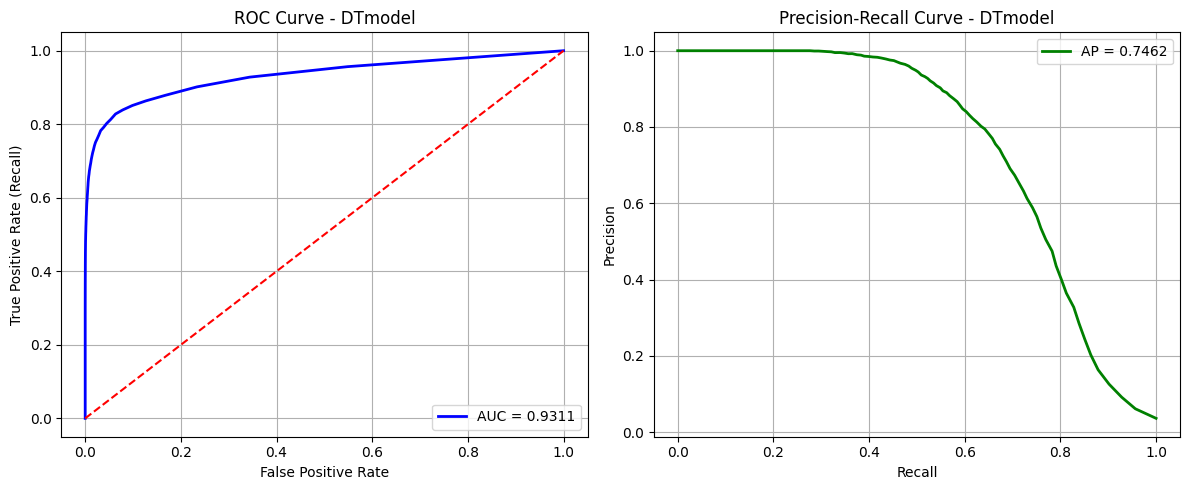

[DTmodel] ROC-AUC: 0.9311, Average Precision: 0.7462


In [73]:
plot_model_curves(y_test,y_pred_proba3,'DTmodel')

In [74]:
y_pred3 = (y_pred_proba3 > 0.2).astype(int)
print(classification_report(y_test,y_pred3))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99    113866
           1       0.69      0.69      0.69      4242

    accuracy                           0.98    118108
   macro avg       0.84      0.84      0.84    118108
weighted avg       0.98      0.98      0.98    118108



In [75]:
y_pred_proba3 = RFmodel.predict_proba(merged_test_df)[:, 1]
y_pred3 = (y_pred_proba3 > 0.2).astype(int)
y_predT3 = pd.DataFrame({
    "TransactionID": TransactionID,
    "isFraud": y_pred3
})
y_predT3.to_csv("RFy_pred.csv", index=False)

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    9.4s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   19.3s finished


In [76]:
from xgboost import XGBClassifier

XGBmodel=XGBClassifier(n_estimators=100, learning_rate=0.05, objective='binary:logistic',random_state=42,)
XGBmodel.fit(x_train, y_train)

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [77]:
from sklearn.metrics import classification_report

y_pred4 = XGBmodel.predict(x_test)
y_pred_proba4 = XGBmodel.predict_proba(x_test)[:, 1]

y_predT4 = XGBmodel.predict(merged_test_df)

y_predT4 = pd.DataFrame({
    "TransactionID": TransactionID,
    "isFraud": y_predT4
})
y_predT4.to_csv("RFy_pred.csv", index=False)

print(classification_report(y_test,y_pred4))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99    113866
           1       0.87      0.39      0.53      4242

    accuracy                           0.98    118108
   macro avg       0.92      0.69      0.76    118108
weighted avg       0.97      0.98      0.97    118108



In [78]:
y_pred4 = (y_pred_proba4 > 0.15).astype(int)
print(classification_report(y_test,y_pred4))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98    113866
           1       0.52      0.56      0.54      4242

    accuracy                           0.97    118108
   macro avg       0.75      0.77      0.76    118108
weighted avg       0.97      0.97      0.97    118108



In [79]:
y_pred_proba4 = XGBmodel.predict_proba(merged_test_df)[:, 1]
y_pred4 = (y_pred_proba4 > 0.2).astype(int)
y_predT4 = pd.DataFrame({
    "TransactionID": TransactionID,
    "isFraud": y_pred4
})
y_predT4.to_csv("XGBy_pred.csv", index=False)

In [80]:
from catboost import CatBoostClassifier, Pool

# Define train & test pools
train_pool = Pool(x_train, y_train)
test_pool = Pool(x_test, y_test)

# Initialize CatBoost model
cat_model = CatBoostClassifier(
    iterations=500,          # number of trees
    learning_rate=0.05,       # smaller = more accurate, slower
    eval_metric='AUC',
    scale_pos_weight=len(y_train[y_train==0]) / len(y_train[y_train==1]), # handle imbalance
    random_seed=42,
    logging_level='Silent',
    early_stopping_rounds=200
)

# Train
cat_model.fit(train_pool, eval_set=test_pool, verbose=200)

In [81]:
from sklearn.metrics import classification_report
y_pred5 = cat_model.predict(x_test)
y_pred_proba5 = cat_model.predict_proba(x_test)[:, 1]

y_predT5 = cat_model.predict(merged_test_df)

y_predT5 = pd.DataFrame({
    "TransactionID": TransactionID,
    "isFraud": y_predT5
})
y_predT5.to_csv("catboosty_pred.csv", index=False)

print(classification_report(y_test,y_pred5))

              precision    recall  f1-score   support

           0       0.99      0.92      0.95    113866
           1       0.23      0.68      0.35      4242

    accuracy                           0.91    118108
   macro avg       0.61      0.80      0.65    118108
weighted avg       0.96      0.91      0.93    118108



In [82]:
y_pred5 = (y_pred_proba5 > 0.15).astype(int)
print(classification_report(y_test,y_pred5))

              precision    recall  f1-score   support

           0       0.99      0.75      0.85    113866
           1       0.10      0.78      0.18      4242

    accuracy                           0.75    118108
   macro avg       0.55      0.76      0.52    118108
weighted avg       0.96      0.75      0.83    118108



In [83]:
input_dim=x_train.shape[1]

In [84]:
import tensorflow
import tensorflow.keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Dropout
NNmodel1 = Sequential()
NNmodel1.add(Dense(input_dim//4,activation='relu',input_dim=input_dim))
NNmodel1.add(Dense(input_dim//6,activation='relu'))
NNmodel1.add(Dense(input_dim//8,activation='relu'))
NNmodel1.add(Dense(input_dim//6,activation='relu'))
NNmodel1.add(Dense(input_dim//4,activation='relu'))
NNmodel1.add(Dense(1,activation='sigmoid'))

2025-09-03 18:17:08.285031: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1756923428.529456     250 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1756923428.598365     250 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-09-03 18:17:24.558408: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call 

In [85]:
NNmodel1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 221)            │       196,027 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 147)            │        32,634 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 110)            │        16,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 147)            │        16,317 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 221)            │        32,708 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           222 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 294,188 (1.12 MB)

 Trainable params: 294,188 (1.12 MB)

 Non-trainable params: 0 (0.00 B)

In [86]:
NNmodel1.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])  #,Precision(name='precision'),Recall(name='recall')

In [87]:
history=NNmodel1.fit(x_train_scaled,y_train,epochs=10,validation_split=.2)

Epoch 1/10
11811/11811 ━━━━━━━━━━━━━━━━━━━━ 68s 5ms/step - accuracy: 0.9778 - loss: 0.0830 - val_accuracy: 0.9816 - val_loss: 0.0641
Epoch 2/10
11811/11811 ━━━━━━━━━━━━━━━━━━━━ 66s 6ms/step - accuracy: 0.9823 - loss: 0.0610 - val_accuracy: 0.9831 - val_loss: 0.0569
Epoch 3/10
11811/11811 ━━━━━━━━━━━━━━━━━━━━ 66s 6ms/step - accuracy: 0.9833 - loss: 0.0564 - val_accuracy: 0.9834 - val_loss: 0.0548
Epoch 4/10
11811/11811 ━━━━━━━━━━━━━━━━━━━━ 67s 6ms/step - accuracy: 0.9838 - loss: 0.0540 - val_accuracy: 0.9839 - val_loss: 0.0560
Epoch 5/10
11811/11811 ━━━━━━━━━━━━━━━━━━━━ 66s 6ms/step - accuracy: 0.9846 - loss: 0.0528 - val_accuracy: 0.9834 - val_loss: 0.0551
Epoch 6/10
11811/11811 ━━━━━━━━━━━━━━━━━━━━ 68s 6ms/step - accuracy: 0.9848 - loss: 0.0514 - val_accuracy: 0.9845 - val_loss: 0.0523
Epoch 7/10
11811/11811 ━━━━━━━━━━━━━━━━━━━━ 67s 6ms/step - accuracy: 0.9856 - loss: 0.0487 - val_accuracy: 0.9835 - val_loss: 0.0572
Epoch 8/10
11811/11811 ━━━━━━━━━━━━━━━━━━━━ 63s 5ms/step - accuracy: 

In [88]:
from sklearn.metrics import classification_report
y_pred_proba6=NNmodel1.predict(x_test_scaled)[:, 0]
y_pred6=np.where(y_pred_proba6>0.5,1,0)

y_pred_probaT6 = NNmodel1.predict(merged_test_df)[:, 0]
y_predT6=np.where(y_pred_probaT6>0.5,1,0)

y_predT6 = pd.DataFrame({
    "TransactionID": TransactionID,
    "isFraud": y_predT6
})
y_predT6.to_csv("catboosty_pred.csv", index=False)

print(classification_report(y_test,y_pred6))

3691/3691 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step
15835/15835 ━━━━━━━━━━━━━━━━━━━━ 25s 2ms/step
              precision    recall  f1-score   support

           0       0.98      0.99      0.99    113866
           1       0.73      0.46      0.56      4242

    accuracy                           0.97    118108
   macro avg       0.86      0.73      0.77    118108
weighted avg       0.97      0.97      0.97    118108



In [89]:
y_pred6=np.where(y_pred_proba6>0.15,1,0)
print(classification_report(y_test,y_pred6))

              precision    recall  f1-score   support

           0       0.99      0.95      0.97    113866
           1       0.32      0.61      0.42      4242

    accuracy                           0.94    118108
   macro avg       0.65      0.78      0.70    118108
weighted avg       0.96      0.94      0.95    118108



In [90]:
y_predT6=np.where(y_pred_probaT6>0.15,1,0)

y_predT6 = pd.DataFrame({
    "TransactionID": TransactionID,
    "isFraud": y_predT6
})
y_predT6.to_csv("NNy_pred.csv", index=False)
